# Setup

In [76]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import ast
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch
from sklearn.feature_extraction.text import CountVectorizer

Read in 2 dfs

In [77]:
# read in with removed comments df
with_removed_df = pd.read_csv('../../data/Reddit_cleaned_includes_removed.csv',  lineterminator='\n', encoding='utf8')

# read in with topic modeeling results df
topic_results_df = pd.read_csv('../../data/topic_model_results.csv',  lineterminator='\n', encoding='utf8')

In [78]:
print(with_removed_df.shape)
print(topic_results_df.shape)

(439642, 9)
(396298, 15)


Explore with removed df

In [79]:
with_removed_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r
0,i think most singaporeans dont give a damn who...,2020-04-11 15:49:23,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
1,fair point the secrecy aspect of it slipped my...,2020-04-03 09:59:08,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
2,range,2020-02-15 15:07:03,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
3,removed,2020-01-03 16:44:46,[deleted],/r/singapore/comments/ej54sm/rsingapore_random...,t3_ej54sm,t1_fcxcdrx,fcxsm0g,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c..."
4,gt this is binary thinking because you think t...,2020-06-04 07:07:39,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."


In [80]:
# Filter the DataFrame where 'text' contains 'removed'
filtered_df = with_removed_df[with_removed_df['text'].str.contains('removed', case=False, na=False)]

# Get the unique usernames
unique_usernames = filtered_df['username'].unique()

In [81]:
print(unique_usernames)

['[deleted]' 'AutoModerator' 'Pvt_Twinkietoes' 'Taellion'
 'ModeratelyHelpfulBot' 'aswlwlwl' 'raptorized' 'tatabusa'
 'KOREANPUBLICSCHOOL' 'inspektordi' 'mildfull' 'bonkers05' 'ybct'
 'rockymountain05' 'troublesome58' 'QzSG' 'dodgethis_sg' 'ryuuheii'
 'prime5119' 'DuePomegranate' 'KeythKatz' '-_af_-' 'Dependent-Analysis92'
 'charroxgrin' 'sageadam' 'Strangeronthebus2019' 'Embarrassed-Chain268'
 'pannerin' 'woshiooqi' 'smolfluffyhakutaku' 'thorsten139'
 'eccentric_eggplant' 'MangoDangoLango' 'coolbakerguy97' 'FanoftheFalls'
 'Foxie13x' 'ngrenjie' 'linglingmozartybae' 'lawlianne' 'uncleemperor'
 'deepfriedceleron' 'sp______ce' 'deangsana' 'Traxgen' 'darklajid'
 'IAmNoTMistaken77' 'RedFaceGeneral' 'zachtan1234' 'jieqint'
 'hornychestnut' 'pjayaredee' 'brownriver12' 'oofmewho' 'yewjrn'
 'crescentgirl' 'Swanriverperth' 'BreakWindow' 'TheMisterPotato'
 'ElopeToTheMoon' 'cooksncremeshake' 'LozSpagatee' 'killing_my_dreams'
 'philosophyOfOneness' 'sneakpeek_bot' 'Projectenzo' 'teestooshort'
 'P

In [82]:
# Get the count of unique usernames
unique_username_count = filtered_df['username'].nunique()

In [83]:
print("Count of unique usernames:", unique_username_count)

Count of unique usernames: 534


add new column

In [84]:
with_removed_df['is_manual_removed'] = with_removed_df['text'].str.contains('removed', case=False, na=False).astype(bool)

In [85]:
with_removed_df[with_removed_df['is_manual_removed'] == True].head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r,is_manual_removed
3,removed,2020-01-03 16:44:46,[deleted],/r/singapore/comments/ej54sm/rsingapore_random...,t3_ej54sm,t1_fcxcdrx,fcxsm0g,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",True
35,removed,2021-03-03 01:07:41,[deleted],/r/singapore/comments/lvx1ai/london_mayor_earn...,t3_lvx1ai,t3_lvx1ai,gphdjxb,t5_2qh8c,"{'collapsed_reason_code': 'DELETED', 'collapse...",True
44,removed,2020-07-11 12:51:44,[deleted],/r/singapore/comments/hp74jj/the_hero_we_need_...,t3_hp74jj,t1_fxn50q9,fxnuenc,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",True
47,your submission has been removed because it do...,2020-07-01 13:12:38,AutoModerator,/r/singapore/comments/hj9wat/is_18m_considered...,t3_hj9wat,t3_hj9wat,fwkw3sw,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",True
60,removed,2020-12-26 09:44:10,[deleted],/r/singapore/comments/kk6tmr/rsingapore_random...,t3_kk6tmr,t1_gh1clxk,gh282rq,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",True


In [86]:
with_removed_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r,is_manual_removed
0,i think most singaporeans dont give a damn who...,2020-04-11 15:49:23,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False
1,fair point the secrecy aspect of it slipped my...,2020-04-03 09:59:08,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False
2,range,2020-02-15 15:07:03,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False
3,removed,2020-01-03 16:44:46,[deleted],/r/singapore/comments/ej54sm/rsingapore_random...,t3_ej54sm,t1_fcxcdrx,fcxsm0g,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",True
4,gt this is binary thinking because you think t...,2020-06-04 07:07:39,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False


merge the 2 dfs

In [87]:
topic_results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r,hateful Score,hateful HR,toxic Score,toxic HR\r,Topic Number,Topic\r
0,i think most singaporeans dont give a damn who...,11/4/2020 15:49,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political\r
1,fair point the secrecy aspect of it slipped my...,3/4/2020 9:59,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships\r
2,range,15/2/2020 15:07,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships\r
3,gt this is binary thinking because you think t...,4/6/2020 7:07,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime\r
4,boo boo poor u lmao,31/10/2020 13:52,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown\r


In [88]:
# List of columns to set to NaN for entries with "removed" in 'text'
columns_to_set_na = ['hateful Score', 'hateful HR', 'toxic Score', 'toxic HR\r', 'Topic Number', 'Topic\r']

# Create a mask for entries with "removed" in the 'text' column
removed_mask = with_removed_df['text'].str.contains('removed', case=False, na=False)

# Set these columns to NaN in a copy of topic_results_df before merging
topic_results_df.loc[removed_mask, columns_to_set_na] = np.nan

In [89]:
# Merge the two DataFrames on 'id', keeping all rows from both and using suffixes to differentiate any duplicate column names
results_df = pd.merge(with_removed_df, topic_results_df, on='id', how='outer', suffixes=('', '_duplicate'))

# Drop any duplicate columns created from the merge
# (for example, columns in topic_results_df that already exist in with_removed_df)
for col in results_df.columns:
    if '_duplicate' in col:
        results_df.drop(col, axis=1, inplace=True)

In [90]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Adjust width to avoid truncation

In [91]:
print(results_df)

                                                     text  \
0                                  the female or male cry   
1                                              double pay   
2                           this is one crazy bad morning   
3                                                 removed   
4       the crazy thing is most people on pmd really d...   
...                                                   ...   
439637  are you really gay or just playing around for ...   
439638  dont give me whatsboutism\n\nit is not traditi...   
439639  excellent should be compulsory for all singapo...   
439640                                                yes   
439641                             report to police db no   

                  timestamp        username  \
0       2020-01-01 00:12:59    Tempestuous-   
1       2020-01-01 00:38:33    Plyergamer27   
2       2020-01-01 00:42:09         gmdotes   
3       2020-01-01 00:48:57       [deleted]   
4       2020-01-01 00:55:10     

In [92]:
# to check if merge was successful
results_df[results_df['id']=='fn3gbrg']

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r,is_manual_removed,hateful Score,hateful HR,toxic Score,toxic HR\r,Topic Number,Topic\r
29632,i think most singaporeans dont give a damn who...,2020-04-11 15:49:23,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,-0.582897,0.0,-0.419338,0.0,0.0,Political\r


In [93]:
results_df[results_df['id']=='fcxsm0g']

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r,is_manual_removed,hateful Score,hateful HR,toxic Score,toxic HR\r,Topic Number,Topic\r
529,removed,2020-01-03 16:44:46,[deleted],/r/singapore/comments/ej54sm/rsingapore_random...,t3_ej54sm,t1_fcxcdrx,fcxsm0g,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",True,NaN,NaN,NaN,NaN,NaN,NaN


follow the rest of setup

In [94]:
# Remove \r from column names
results_df.columns = results_df.columns.str.strip()

# Strip \r and other whitespace characters from a specific column (e.g., 'column_name')
results_df['Topic'] = results_df['Topic'].str.strip()

results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,is_manual_removed,hateful Score,hateful HR,toxic Score,toxic HR,Topic Number,Topic
0,the female or male cry,2020-01-01 00:12:59,Tempestuous-,/r/singapore/comments/ei9klf/rsingapore_random...,t3_ei9klf,t1_fcohcxx,fcoor03,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,-1.216313,0.0,-0.181924,0.0,2.0,Race & Religion
1,double pay,2020-01-01 00:38:33,Plyergamer27,/r/singapore/comments/ei5lec/lets_take_a_momen...,t3_ei5lec,t3_ei5lec,fcoqujj,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",False,-1.063543,0.0,-0.499782,0.0,2.0,Race & Religion
2,this is one crazy bad morning,2020-01-01 00:42:09,gmdotes,/r/singapore/comments/ehsyiu/rsingapore_random...,t3_ehsyiu,t1_fcnrh63,fcor57l,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,-1.007145,0.0,-0.369454,0.0,4.0,Relationships
3,removed,2020-01-01 00:48:57,[deleted],/r/singapore/comments/eibm65/premiumflea_marke...,t3_eibm65,t3_eibm65,fcorov8,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",True,NaN,NaN,NaN,NaN,NaN,NaN
4,the crazy thing is most people on pmd really d...,2020-01-01 00:55:10,jupiter1_,/r/singapore/comments/ei0oby/teen_pmd_rider_hi...,t3_ei0oby,t3_ei0oby,fcos6ik,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,-1.078415,0.0,-0.348272,0.0,1.0,Covid-19


In [95]:
# rename new columns
results_df.rename(columns={
    'hateful Score': 'hateful_score',
    'hateful HR': 'hateful_prediction',
    'toxic Score': 'toxic_score',
    'toxic HR': 'toxic_prediction',
    'Topic Number': 'topic_number',
    'Topic': 'topic'
}, inplace=True)

results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,is_manual_removed,hateful_score,hateful_prediction,toxic_score,toxic_prediction,topic_number,topic
0,the female or male cry,2020-01-01 00:12:59,Tempestuous-,/r/singapore/comments/ei9klf/rsingapore_random...,t3_ei9klf,t1_fcohcxx,fcoor03,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,-1.216313,0.0,-0.181924,0.0,2.0,Race & Religion
1,double pay,2020-01-01 00:38:33,Plyergamer27,/r/singapore/comments/ei5lec/lets_take_a_momen...,t3_ei5lec,t3_ei5lec,fcoqujj,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",False,-1.063543,0.0,-0.499782,0.0,2.0,Race & Religion
2,this is one crazy bad morning,2020-01-01 00:42:09,gmdotes,/r/singapore/comments/ehsyiu/rsingapore_random...,t3_ehsyiu,t1_fcnrh63,fcor57l,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,-1.007145,0.0,-0.369454,0.0,4.0,Relationships
3,removed,2020-01-01 00:48:57,[deleted],/r/singapore/comments/eibm65/premiumflea_marke...,t3_eibm65,t3_eibm65,fcorov8,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",True,NaN,NaN,NaN,NaN,NaN,NaN
4,the crazy thing is most people on pmd really d...,2020-01-01 00:55:10,jupiter1_,/r/singapore/comments/ei0oby/teen_pmd_rider_hi...,t3_ei0oby,t3_ei0oby,fcos6ik,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,-1.078415,0.0,-0.348272,0.0,1.0,Covid-19


In [96]:
# convert data to appropriate datatypes
results_df['text'] = results_df['text'].astype(str)
results_df['timestamp'] = pd.to_datetime(results_df['timestamp'], format='%Y-%m-%d %H:%M:%S')
results_df['username'] = results_df['username'].astype(str)
results_df['link'] = results_df['link'].astype(str)
results_df['link_id'] = results_df['link_id'].astype(str)
results_df['parent_id'] = results_df['parent_id'].astype(str)
results_df['id'] = results_df['id'].astype(str)
results_df['subreddit_id'] = results_df['subreddit_id'].astype(str)
results_df['moderation'] = results_df['moderation'].tolist()
results_df['hateful_score'] = results_df['hateful_score'].astype('float32')
results_df['hateful_prediction'] = results_df['hateful_prediction'].astype('Int16')  # Nullable integer type
results_df['toxic_score'] = results_df['toxic_score'].astype('float32')
results_df['toxic_prediction'] = results_df['toxic_prediction'].astype('Int16')  # Nullable integer type
results_df['topic_number'] = results_df['topic_number'].astype('category')
results_df['topic'] = results_df['topic'].astype('category')

In [97]:
# Group by year and month to track moderation actions over time
results_df['year_month'] = results_df['timestamp'].dt.to_period('M')

# extract date from datetime stamp
results_df['timestamp'] = results_df['timestamp'].dt.date

results_df['timestamp'].head()

0    2020-01-01
1    2020-01-01
2    2020-01-01
3    2020-01-01
4    2020-01-01
Name: timestamp, dtype: object

In [98]:
# Mapping of subreddit_id to subreddit names
subreddit_names = {
    't5_2qh8c': 'r/singapore',
    't5_xnx04': 'r/singaporeraw',
    't5_70s6ew': 'r/singaporehappenings'
}

# Map the subreddit_id values to their respective names
results_df['subreddit_name'] = results_df['subreddit_id'].map(subreddit_names)

# 1. Toxic and manual moderated across time plot

In [103]:
# Group by day and calculate the average score
average_toxicity_and_moderation_per_day_df = results_df.groupby(results_df['year_month']).agg(
    average_num_removed=('is_manual_removed', 'mean'), 
    average_toxic_score=('toxic_score', 'mean'),
    average_hateful_score=('hateful_score', 'mean')
).reset_index()

# create percentage column
average_toxicity_and_moderation_per_day_df['removed_percentage'] = average_toxicity_and_moderation_per_day_df['average_num_removed']*100

# Convert the 'year_month' column to string or datetime format
average_toxicity_and_moderation_per_day_df['year_month'] = average_toxicity_and_moderation_per_day_df['year_month'].astype(str)

# Convert 'year_month' column to datetime format
average_toxicity_and_moderation_per_day_df['year_month'] = pd.to_datetime(average_toxicity_and_moderation_per_day_df['year_month'])

In [104]:
average_toxicity_and_moderation_per_day_df

,year_month,average_num_removed,average_toxic_score,average_hateful_score,removed_percentage
0,2020-01-01,0.025845,-0.527579,-0.974161,2.584466
1,2020-02-01,0.030793,-0.554780,-0.974303,3.079338
2,2020-03-01,0.020391,-0.557787,-0.978310,2.039073
3,2020-04-01,0.022904,-0.536786,-0.979461,2.290392
4,2020-05-01,0.021841,-0.533044,-0.977600,2.184056
5,2020-06-01,0.017739,-0.499344,-0.973834,1.773948
6,2020-07-01,0.016643,-0.485424,-0.971662,1.664333
7,2020-08-01,0.017563,-0.540961,-0.986900,1.756342
8,2020-09-01,0.016457,-0.526317,-0.986261,1.645734
9,2020-10-01,0.015205,-0.527313,-0.994040,1.520541


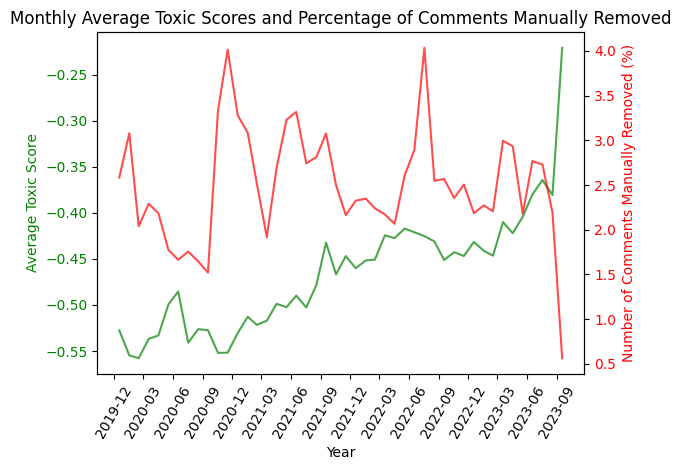

In [138]:
# Create the plot
fig, ax1 = plt.subplots()

# Plot the first DataFrame on the left y-axis with transparency
ax1.plot(average_toxicity_and_moderation_per_day_df['year_month'], 
         average_toxicity_and_moderation_per_day_df['average_toxic_score'], 
         label='Toxic Score', color='green', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Toxic Score', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Rotate the tick labels more (ensure this is applied to ax1)
plt.xticks(rotation=60)  # Rotate by 60 degrees (you can adjust as needed)

# Create a second y-axis for the second variable with transparency
ax2 = ax1.twinx()
ax2.plot(average_toxicity_and_moderation_per_day_df['year_month'], 
         average_toxicity_and_moderation_per_day_df['removed_percentage'], 
         label='Number of Comments Manually Removed (%)', color='red', alpha=0.7)
ax2.set_ylabel('Number of Comments Manually Removed (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Format x-axis to show monthly ticks and set them quarterly (every 3 months)
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15, interval=3))  # Quarterly ticks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as year-month

# Turn off x-axis tick labels for ax2 to prevent duplication
ax2.get_xaxis().set_visible(False)

# Set title
plt.title('Monthly Average Toxic Scores and Percentage of Comments Manually Removed')

# Use tight_layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()

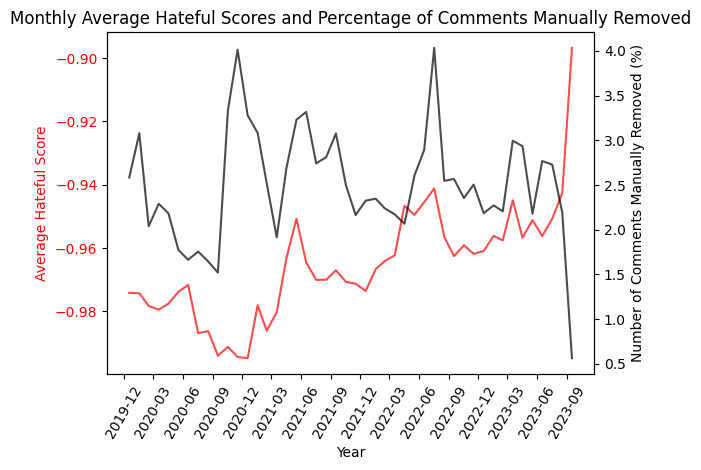

In [107]:
# Create the plot
fig, ax1 = plt.subplots()

# Plot the first DataFrame on the left y-axis with transparency
ax1.plot(average_toxicity_and_moderation_per_day_df['year_month'], 
         average_toxicity_and_moderation_per_day_df['average_hateful_score'], 
         label='Hateful Score', color='red', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Hateful Score', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Rotate the tick labels more (ensure this is applied to ax1)
plt.xticks(rotation=60)  # Rotate by 60 degrees (you can adjust as needed)

# Create a second y-axis for the second variable with transparency
ax2 = ax1.twinx()
ax2.plot(average_toxicity_and_moderation_per_day_df['year_month'], 
         average_toxicity_and_moderation_per_day_df['removed_percentage'], 
         label='Number of Comments Manually Removed (%)', color='black', alpha=0.7)
ax2.set_ylabel('Number of Comments Manually Removed (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Format x-axis to show monthly ticks and set them quarterly (every 3 months)
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15, interval=3))  # Quarterly ticks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as year-month

# Turn off x-axis tick labels for ax2 to prevent duplication
ax2.get_xaxis().set_visible(False)

# Set title
plt.title('Monthly Average Hateful Scores and Percentage of Comments Manually Removed')

# Use tight_layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()

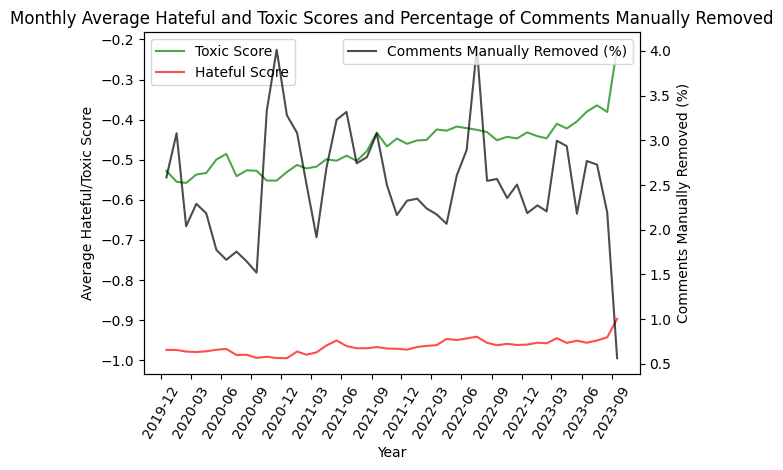

In [106]:
# Create the plot
fig, ax1 = plt.subplots()

# Plot 'average_toxic_score' on the left y-axis with transparency
ax1.plot(average_toxicity_and_moderation_per_day_df['year_month'], 
         average_toxicity_and_moderation_per_day_df['average_toxic_score'], 
         label='Toxic Score', color='green', alpha=0.7)

# Plot 'average_hateful_score' on the left y-axis in red
ax1.plot(average_toxicity_and_moderation_per_day_df['year_month'], 
         average_toxicity_and_moderation_per_day_df['average_hateful_score'], 
         label='Hateful Score', color='red', alpha=0.7)

# Update y-axis label
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Hateful/Toxic Score', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc="upper left")

# Rotate the tick labels on x-axis
plt.xticks(rotation=60)

# Create a second y-axis for 'removed_percentage'
ax2 = ax1.twinx()
ax2.plot(average_toxicity_and_moderation_per_day_df['year_month'], 
         average_toxicity_and_moderation_per_day_df['removed_percentage'], 
         label='Comments Manually Removed (%)', color='black', alpha=0.7)
ax2.set_ylabel('Comments Manually Removed (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc="upper right")

# Format x-axis for monthly ticks and set them quarterly (every 3 months)
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15, interval=3))  # Quarterly ticks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Hide x-axis tick labels for ax2 to prevent duplication
ax2.get_xaxis().set_visible(False)

# Set title
plt.title('Monthly Average Hateful and Toxic Scores and Percentage of Comments Manually Removed')

# Use tight_layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()

In general, there is no general trend for number of comments being manually removed. But there are 3 exceptions: one in July 2020 (polling day), May 2022, and May 2023 onwards, especially after August 2023. All 3 periods show an increase in toxicity in comments, but a failure to maintain moderation activity, but more importantly, reduction in removed comments, during those periods.

# 2. wordcloud across time

In [ ]:
# Convert 'timestamp' column to datetime (if not already in datetime format)
# jul_2020_df['timestamp'] = pd.to_datetime(jul_2020_df['timestamp'])

In [ ]:
# Make sure 'timestamp' is in datetime.date format (you may already have this, but let's ensure consistency)
# results_df['timestamp'] = results_df['timestamp'].apply(lambda x: x.date() if isinstance(x, datetime.datetime) else x)

In [66]:
results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,is_manual_removed,hateful_score,hateful_prediction,toxic_score,toxic_prediction,topic_number,topic,year_month,subreddit_name
0,the female or male cry,2020-01-01,Tempestuous-,/r/singapore/comments/ei9klf/rsingapore_random...,t3_ei9klf,t1_fcohcxx,fcoor03,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,-1.216313,0,-0.181924,0,2.0,Race & Religion,2020-01,r/singapore
1,double pay,2020-01-01,Plyergamer27,/r/singapore/comments/ei5lec/lets_take_a_momen...,t3_ei5lec,t3_ei5lec,fcoqujj,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",False,-1.063543,0,-0.499782,0,2.0,Race & Religion,2020-01,r/singapore
2,this is one crazy bad morning,2020-01-01,gmdotes,/r/singapore/comments/ehsyiu/rsingapore_random...,t3_ehsyiu,t1_fcnrh63,fcor57l,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,-1.007145,0,-0.369454,0,4.0,Relationships,2020-01,r/singapore
3,removed,2020-01-01,[deleted],/r/singapore/comments/eibm65/premiumflea_marke...,t3_eibm65,t3_eibm65,fcorov8,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",True,NaN,<NA>,NaN,<NA>,NaN,NaN,2020-01,r/singapore
4,the crazy thing is most people on pmd really d...,2020-01-01,jupiter1_,/r/singapore/comments/ei0oby/teen_pmd_rider_hi...,t3_ei0oby,t3_ei0oby,fcos6ik,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,-1.078415,0,-0.348271,0,1.0,Covid-19,2020-01,r/singapore


In [67]:
# filter date for days with most and least toxic comments
oct_2020_df = results_df[(results_df['year_month']=='2020-10') & (results_df['toxic_prediction'] == 1)]
aug_2021_df = results_df[(results_df['year_month']=='2021-08') & (results_df['toxic_prediction'] == 1)]
jun_2022_df = results_df[(results_df['year_month']=='2022-06') & (results_df['toxic_prediction'] == 1)]

In [69]:
# Preprocessing function
tokenizer = RegexpTokenizer(r'\b[a-zA-Z]+\b')
wordnet_lemmatizer = WordNetLemmatizer()
custom_stop_words = {'and', 'the', 'is', 'to', 'in', 'that', 'it', 'of', 'just', 'like', 'wa', 'dont', 'removed', 'deleted'}

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize tokens
    tokens = [token for token in tokens if token not in custom_stop_words]  # Remove custom stop words
    return ' '.join(tokens)

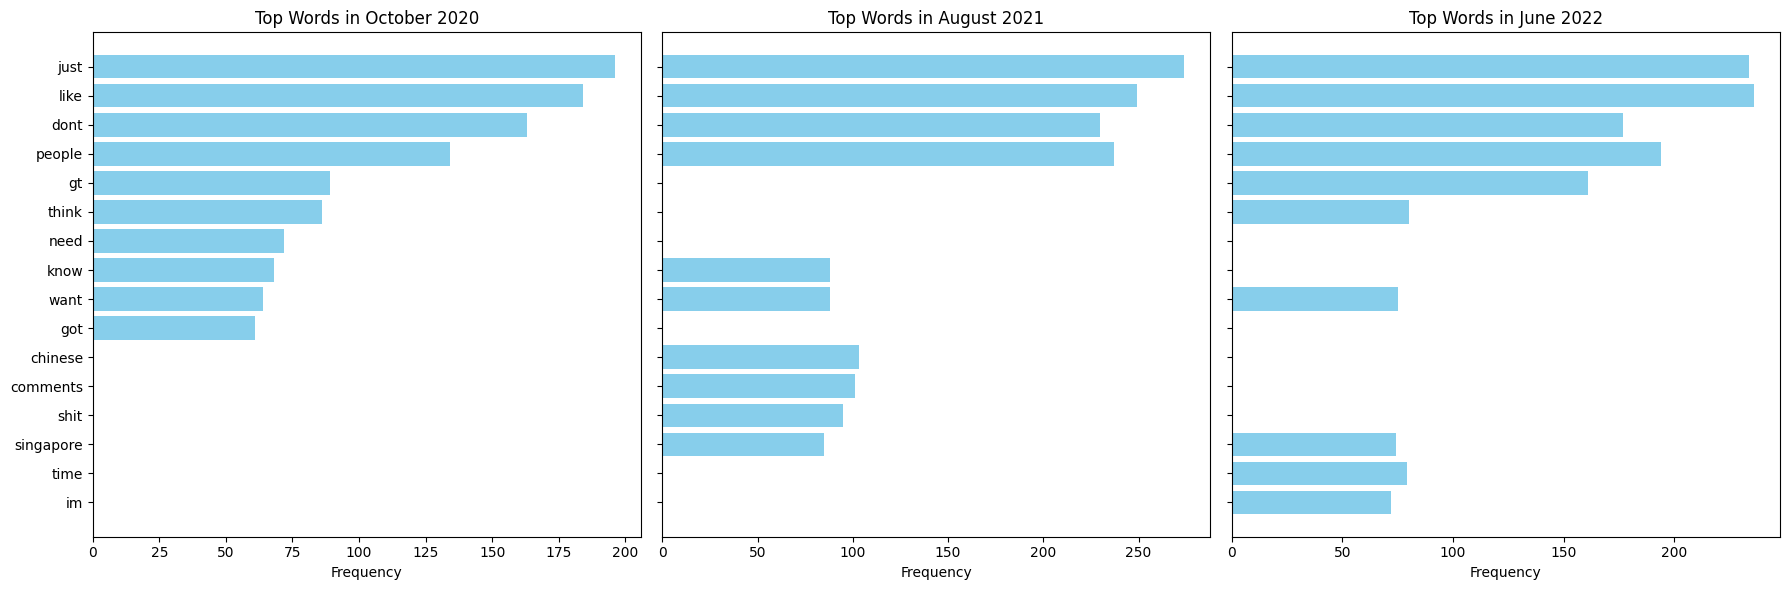

In [72]:
# Define a function to get top words for a given month
def get_top_words(data, num_words=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=500)
    word_matrix = vectorizer.fit_transform(data['text'].fillna(''))  # Handle any NaN in 'text'
    word_counts = word_matrix.sum(axis=0).A1  # Sum up word counts
    words = vectorizer.get_feature_names_out()
    
    # Create DataFrame of words and counts, and sort by frequency
    word_freq_df = pd.DataFrame({'word': words, 'frequency': word_counts}).sort_values(by='frequency', ascending=False)
    return word_freq_df.head(num_words)

# Filter and get top words for each month
top_words_oct_2020 = get_top_words(results_df[(results_df['year_month'] == '2020-10') & (results_df['toxic_prediction'] == 1)])
top_words_aug_2021 = get_top_words(results_df[(results_df['year_month'] == '2021-08') & (results_df['toxic_prediction'] == 1)])
top_words_jun_2022 = get_top_words(results_df[(results_df['year_month'] == '2022-06') & (results_df['toxic_prediction'] == 1)])

# Set up a 1x3 subplot layout to compare the months
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for each month
for ax, data, title in zip(axes, [top_words_oct_2020, top_words_aug_2021, top_words_jun_2022], 
                           ['October 2020', 'August 2021', 'June 2022']):
    ax.barh(data['word'], data['frequency'], color='skyblue')
    ax.set_title(f'Top Words in {title}')
    ax.invert_yaxis()  # Highest frequency at the top
    ax.set_xlabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

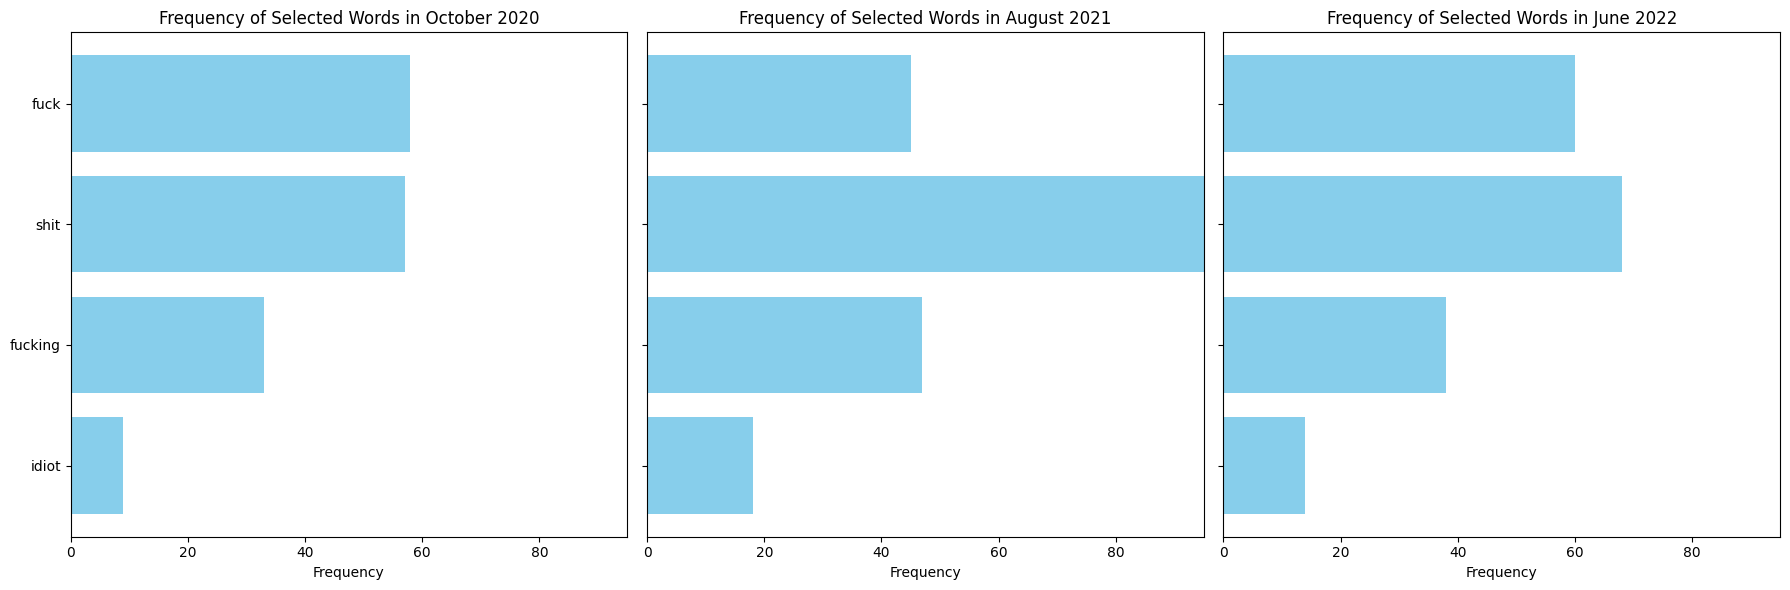

In [75]:
# Define a function to get frequencies of specified words for a given month
def get_word_frequencies(data, words_of_interest, num_words=10):
    vectorizer = CountVectorizer(vocabulary=words_of_interest)  # Limit vocabulary to words of interest
    word_matrix = vectorizer.fit_transform(data['text'].fillna(''))  # Handle any NaN in 'text'
    word_counts = word_matrix.sum(axis=0).A1  # Sum up word counts
    words = vectorizer.get_feature_names_out()
    
    # Create DataFrame of words and counts, and sort by frequency
    word_freq_df = pd.DataFrame({'word': words, 'frequency': word_counts}).sort_values(by='frequency', ascending=False)
    return word_freq_df.head(num_words)

# List of words to focus on
words_of_interest = ['fuck', 'shit', 'fucking', 'idiot']

# Filter and get word frequencies for each month
top_words_oct_2020 = get_word_frequencies(results_df[(results_df['year_month'] == '2020-10') & (results_df['toxic_prediction'] == 1)], words_of_interest)
top_words_aug_2021 = get_word_frequencies(results_df[(results_df['year_month'] == '2021-08') & (results_df['toxic_prediction'] == 1)], words_of_interest)
top_words_jun_2022 = get_word_frequencies(results_df[(results_df['year_month'] == '2022-06') & (results_df['toxic_prediction'] == 1)], words_of_interest)

# Set up a 1x3 subplot layout to compare the months
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Get the maximum y-axis limit across all data for scaling
max_frequency = max(top_words_oct_2020['frequency'].max(), top_words_aug_2021['frequency'].max(), top_words_jun_2022['frequency'].max())

# Plot for each month
for ax, data, title in zip(axes, [top_words_oct_2020, top_words_aug_2021, top_words_jun_2022], 
                           ['October 2020', 'August 2021', 'June 2022']):
    ax.barh(data['word'], data['frequency'], color='skyblue')
    ax.set_title(f'Frequency of Selected Words in {title}')
    ax.invert_yaxis()  # Highest frequency at the top
    ax.set_xlabel('Frequency')
    ax.set_xlim(0, max_frequency)  # Scale x-axis across all plots

# Display the plot
plt.tight_layout()
plt.show()

# 2. manual moderation on big 3 events vs "average" day

In [101]:
# Sort DataFrame by 'average_toxic_score'
sorted_df = average_toxicity_and_moderation_per_day_df.sort_values(by='average_toxic_score')

# Calculate the median of 'average_toxic_score'
median_index = len(sorted_df) // 2

# Find the median 'year_month' based on 'average_toxic_score'
median_year_month = sorted_df.iloc[median_index]['year_month']

In [102]:
print(median_year_month)

2022-02-01 00:00:00


In [107]:
results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,is_manual_removed,hateful_score,hateful_prediction,toxic_score,toxic_prediction,topic_number,topic,year_month
0,the female or male cry,2020-01-01,Tempestuous-,/r/singapore/comments/ei9klf/rsingapore_random...,t3_ei9klf,t1_fcohcxx,fcoor03,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-1.216313,0,-0.181924,0,2.0,Race & Religion,2020-01
1,double pay,2020-01-01,Plyergamer27,/r/singapore/comments/ei5lec/lets_take_a_momen...,t3_ei5lec,t3_ei5lec,fcoqujj,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",0.0,-1.063543,0,-0.499782,0,2.0,Race & Religion,2020-01
2,this is one crazy bad morning,2020-01-01,gmdotes,/r/singapore/comments/ehsyiu/rsingapore_random...,t3_ehsyiu,t1_fcnrh63,fcor57l,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-1.007145,0,-0.369454,0,4.0,Relationships,2020-01
3,removed,2020-01-01,[deleted],/r/singapore/comments/eibm65/premiumflea_marke...,t3_eibm65,t3_eibm65,fcorov8,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",1.0,NaN,<NA>,NaN,<NA>,NaN,NaN,2020-01
4,the crazy thing is most people on pmd really d...,2020-01-01,jupiter1_,/r/singapore/comments/ei0oby/teen_pmd_rider_hi...,t3_ei0oby,t3_ei0oby,fcos6ik,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-1.078415,0,-0.348271,0,1.0,Covid-19,2020-01


In [113]:
# Ensure 'timestamp' is in datetime format
results_df['timestamp'] = pd.to_datetime(results_df['timestamp'], errors='coerce')

# Group by year and month, then convert 'year_month' to a string for compatibility
results_df['year_month'] = results_df['timestamp'].dt.to_period('M').astype(str)

# List of year-month pairs to filter for, as strings
year_months_to_filter = ['2020-07', '2022-02', '2022-05', '2023-08']

# Filter DataFrame based on the 'year_month' column values
months_of_interest_vs_average_month_df = results_df[results_df['year_month'].isin(year_months_to_filter)]

In [114]:
months_of_interest_vs_average_month_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,is_manual_removed,hateful_score,hateful_prediction,toxic_score,toxic_prediction,topic_number,topic,year_month
59082,i dont think so me studying for alevels got me...,2020-07-01,dokidoki_meow,/r/singapore/comments/hizcmr/can_one_really_ha...,t3_hizcmr,t3_hizcmr,fwj6my9,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-0.960182,0,0.040603,0,3.0,Transport,2020-07
59083,deleted,2020-07-01,[deleted],/r/singapore/comments/hizek8/what_if_there_com...,t3_hizek8,t3_hizek8,fwj771p,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",0.0,NaN,<NA>,NaN,<NA>,NaN,NaN,2020-07
59084,outside of elections the incumbent tend to use...,2020-07-01,velvethunder,/r/singapore/comments/hinruw/thoughts_on_chee_...,t3_hinruw,t1_fwhhikb,fwj8y3z,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-1.001763,0,-0.640561,0,5.0,Crime,2020-07
59085,had a vvv wonderful dream i almost didnt wanna...,2020-07-01,charroxgrin,/r/singapore/comments/hixdn0/rsingapore_random...,t3_hixdn0,t3_hixdn0,fwj9duo,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-1.038952,0,-1.140755,0,2.0,Race & Religion,2020-07
59086,fogger rick rolled again,2020-07-01,nyaineng,/r/singapore/comments/hil4ei/pap_candidate_mur...,t3_hil4ei,t1_fwh9kp9,fwj9h7p,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-0.994573,0,-0.803844,0,4.0,Relationships,2020-07


In [122]:
# Ensure that the columns are converted to integers
months_of_interest_vs_average_month_df['is_manual_removed'] = months_of_interest_vs_average_month_df['is_manual_removed'].astype(int)

# Group by 'year_month' and calculate the sum for 'is_manual_removed' and count of total comments (number of rows)
summary_df = months_of_interest_vs_average_month_df.groupby('year_month').agg(
    is_manual_removed_sum=('is_manual_removed', 'sum'),
    total_comments=('is_manual_removed', 'size'),
    average_toxic_score=('toxic_score', 'mean')
).reset_index()

# Calculate the percentage of manually removed comments per month
summary_df['percentage_removed'] = (summary_df['is_manual_removed_sum'] / summary_df['total_comments']) * 100

C:\Users\caleb\AppData\Local\Temp\ipykernel_21704\1407006496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  months_of_interest_vs_average_month_df['is_manual_removed'] = months_of_interest_vs_average_month_df['is_manual_removed'].astype(int)


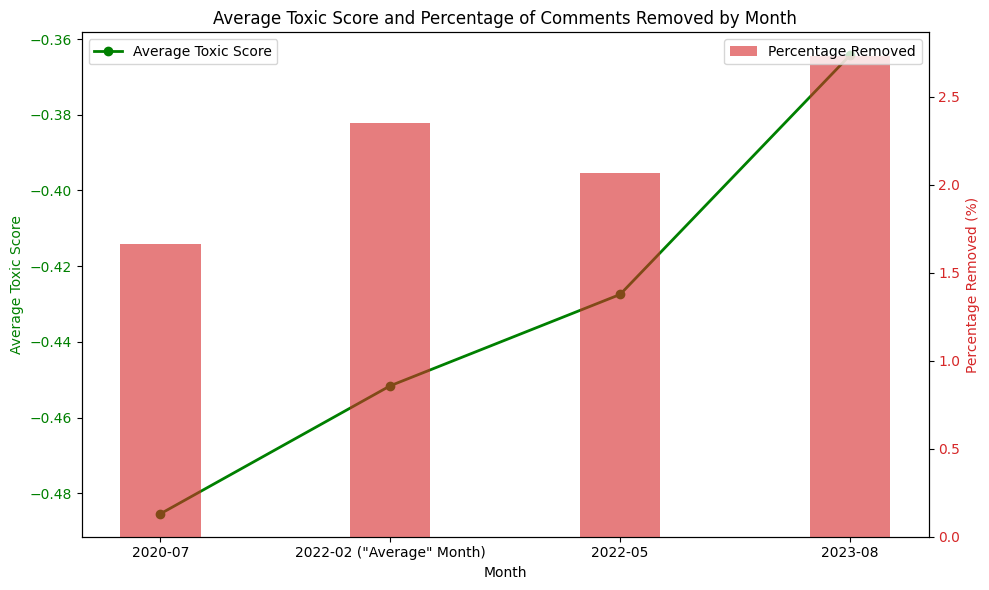

In [ ]:
# List of event names corresponding to the unique timestamps
event_names = ['2020-07', '2022-02 ("Average" Month)', '2022-05', '2023-08']

# Set the width of each bar
bar_width = 0.35

# Set positions for the bars, centered at each tick
index = np.arange(len(summary_df))

# Create the figure and the first y-axis for the line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the percentage of comments removed as a red bar on ax2 with lower opacity
ax2 = ax1.twinx()
ax2.bar(index, summary_df['percentage_removed'], width=bar_width, color='#d62728', alpha=0.6, label='Percentage Removed')  # Red with opacity
ax2.set_ylabel('Percentage Removed (%)', color='#d62728')
ax2.tick_params(axis='y', labelcolor='#d62728')

# Plot the average toxic score as a green line on ax1, overlaying the bars
ax1.plot(index, summary_df['average_toxic_score'], color='green', marker='o', linestyle='-', linewidth=2, label='Average Toxic Score')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Toxic Score', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Set the x-ticks to the centered positions and label with event names
ax1.set_xticks(index)
ax1.set_xticklabels(event_names)

# Set the title
ax1.set_title('Average Toxic Score and Percentage of Comments Removed by Month')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Make the plot look nicer
plt.tight_layout()

# Show the plot
plt.show()


In general, percentage removed increases with toxicity.

However, there was a decrease in percentage of comments removed in May 2022.

# 3. find days with highest avg toxicity scores in these months

In [132]:
# filter date for days with most and least toxic comments
jul_2020_df = results_df[results_df['year_month']=='2020-07']
average_month_df = results_df[results_df['year_month']=='2022-02']
may_2022_df = results_df[results_df['year_month']=='2022-05']
aug_2023_df = results_df[results_df['year_month']=='2023-08']

In [139]:
jul_2020_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,is_manual_removed,hateful_score,hateful_prediction,toxic_score,toxic_prediction,topic_number,topic,year_month
59082,i dont think so me studying for alevels got me...,2020-07-01,dokidoki_meow,/r/singapore/comments/hizcmr/can_one_really_ha...,t3_hizcmr,t3_hizcmr,fwj6my9,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-0.960182,0,0.040603,0,3.0,Transport,2020-07
59083,deleted,2020-07-01,[deleted],/r/singapore/comments/hizek8/what_if_there_com...,t3_hizek8,t3_hizek8,fwj771p,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",0.0,NaN,<NA>,NaN,<NA>,NaN,NaN,2020-07
59084,outside of elections the incumbent tend to use...,2020-07-01,velvethunder,/r/singapore/comments/hinruw/thoughts_on_chee_...,t3_hinruw,t1_fwhhikb,fwj8y3z,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-1.001763,0,-0.640561,0,5.0,Crime,2020-07
59085,had a vvv wonderful dream i almost didnt wanna...,2020-07-01,charroxgrin,/r/singapore/comments/hixdn0/rsingapore_random...,t3_hixdn0,t3_hixdn0,fwj9duo,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-1.038952,0,-1.140755,0,2.0,Race & Religion,2020-07
59086,fogger rick rolled again,2020-07-01,nyaineng,/r/singapore/comments/hil4ei/pap_candidate_mur...,t3_hil4ei,t1_fwh9kp9,fwj9h7p,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-0.994573,0,-0.803844,0,4.0,Relationships,2020-07


In [ ]:
# Assuming jul_2020_df is your DataFrame
# Convert 'timestamp' column to datetime (if not already in datetime format)
jul_2020_df['timestamp'] = pd.to_datetime(jul_2020_df['timestamp'])

# Group by the 'timestamp' column and calculate the mean of 'toxic_score' for each day
daily_avg_toxic_score = jul_2020_df.groupby('timestamp')['toxic_score'].mean().reset_index()

# Find the day with the highest average toxic score
max_avg_toxic_score_day = daily_avg_toxic_score.loc[daily_avg_toxic_score['toxic_score'].idxmax()]

In [140]:
# List of DataFrames to loop through
dfs = [jul_2020_df, average_month_df, may_2022_df, aug_2023_df]

# Initialize an empty list to store the results
max_avg_toxicity_days = []

# Loop through each DataFrame
for df in dfs:
    # Convert 'timestamp' column to datetime if not already in datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Group by 'timestamp' and calculate the mean of 'toxic_score' for each day
    daily_avg_toxic_score = df.groupby('timestamp')['toxic_score'].mean().reset_index()

    # Find the day with the highest average toxic score
    max_avg_toxic_score_day = daily_avg_toxic_score.loc[daily_avg_toxic_score['toxic_score'].idxmax()]
    
    # Append the result (the day with the highest average toxic score)
    max_avg_toxicity_days.append(max_avg_toxic_score_day['timestamp'].date())

C:\Users\caleb\AppData\Local\Temp\ipykernel_21704\360763587.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])
C:\Users\caleb\AppData\Local\Temp\ipykernel_21704\360763587.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])
C:\Users\caleb\AppData\Local\Temp\ipykernel_21704\360763587.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [141]:
print(max_avg_toxicity_days)

[datetime.date(2020, 7, 5), datetime.date(2022, 2, 16), datetime.date(2022, 5, 23), datetime.date(2023, 8, 22)]


# 4. wordcloud for these 4 days

In [151]:
# Make sure 'timestamp' is in datetime.date format (you may already have this, but let's ensure consistency)
results_df['timestamp'] = results_df['timestamp'].apply(lambda x: x.date() if isinstance(x, datetime.datetime) else x)

In [156]:
# filter date for days with most and least toxic comments
jul_5_2020_df = results_df[results_df['timestamp'] == datetime.date(2020, 7, 5)]
Feb_16_2022_df = results_df[results_df['timestamp'] == datetime.date(2022, 2, 16)]
may_23_2022_df = results_df[results_df['timestamp'] == datetime.date(2022, 5, 23)]
aug_22_2023_df = results_df[results_df['timestamp'] == datetime.date(2023, 8, 22)]

In [157]:
# Preprocessing function
tokenizer = RegexpTokenizer(r'\b[a-zA-Z]+\b')
wordnet_lemmatizer = WordNetLemmatizer()
custom_stop_words = {'and', 'the', 'is', 'to', 'in', 'that', 'it', 'of', 'just', 'like', 'wa', 'dont', 'removed', 'deleted'}

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize tokens
    tokens = [token for token in tokens if token not in custom_stop_words]  # Remove custom stop words
    return ' '.join(tokens)

C:\Users\caleb\AppData\Local\Temp\ipykernel_21704\1467890554.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].fillna('')
c:\Users\caleb\OneDrive - National University of Singapore\school\DSA\DSA4264\DSA4264\venv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha'] not in stop_words.
  warnings.warn(


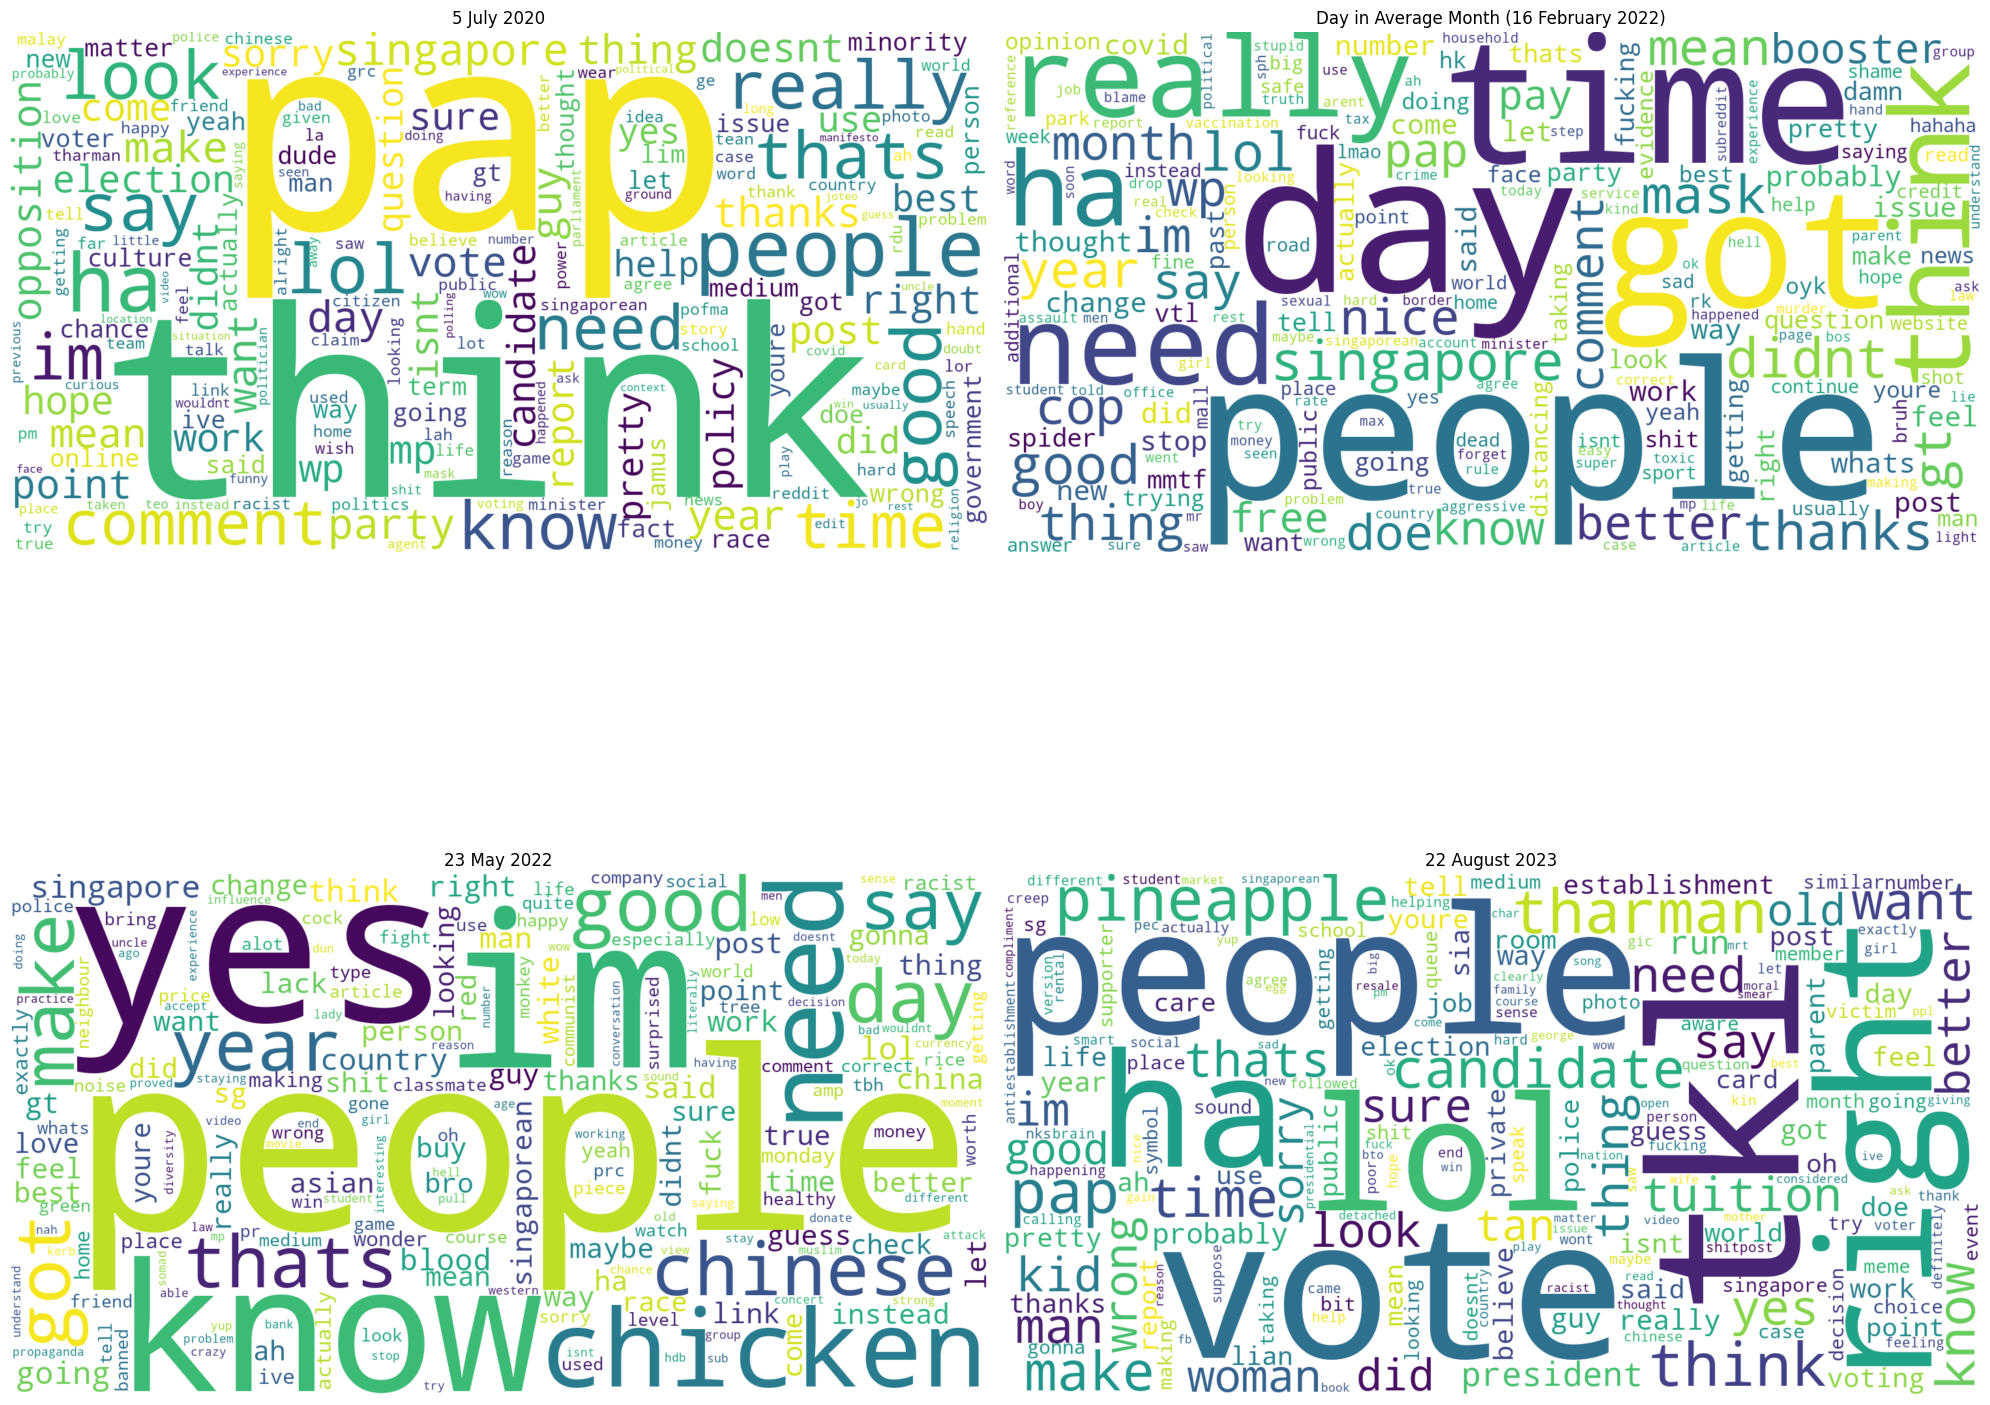

In [158]:
# List of DataFrames and corresponding titles for each word cloud
dataframes = [
    (jul_5_2020_df, "5 July 2020"),
    (Feb_16_2022_df, "Day in Average Month (16 February 2022)"),
    (may_23_2022_df, "23 May 2022"),
    (aug_22_2023_df, "22 August 2023")
]

# Set up the figure for a 2x2 grid layout
plt.figure(figsize=(20, 20))

# Loop through the DataFrames to generate word clouds
for i, (df, title) in enumerate(dataframes):
    # Create TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocess, stop_words='english', min_df=1, max_features=500)

    # Ensure 'text' column has no missing values
    df['text'] = df['text'].fillna('')

    # Fit and transform the text data
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'].values)

    # Sum the TF-IDF scores for each term
    tfidf_sum = tfidf_matrix.sum(axis=0)

    # Extract words and corresponding scores
    words = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_sum.A1

    # Create dictionary of word frequencies
    word_scores = dict(zip(words, tfidf_scores))

    # Generate the word cloud
    wordcloud = WordCloud(width=1500, height=800, background_color='white', colormap='viridis').generate_from_frequencies(word_scores)

    # Display the word cloud
    plt.subplot(2, 2, i + 1)  # Arrange in a 2x2 grid
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title(title)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

5 July 2020 is before polling day. it contains words like, 'pap', 'party', 'opposition'.

16 feb 2022 comes after news on 14 feb of the announcement of the approval of the covavax covid-19 vaccine, thus words like 'mask', 'booster', 'covid', and 'vtl' are repeated.

'chicken' stands out in the 23 may 2022 wordcloud, 'rice' can be found, but not as prevalent. This follows the news that Malaysia will halt monthly export of chiickens from june 2022.

22 august 2023 was Nomination Day for Singapore's 2023 presidential election. this is backed up by words like, 'vote', 'tkl', 'pineapple', 'tharman', 'president', 'candidate'.


These 4 wordclouds show that political events and news breaking about the change of lifestyle in Singapore are correlated with higher toxicity.
Additionally, the 5 July 2020 wordcloud shows that social media platforms can be toxic in anticipation of political events, showing that they do not occur only on the day itself.

# 4. plot manual moderation against toxicity by user

In [28]:
results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,is_manual_removed,hateful_score,hateful_prediction,toxic_score,toxic_prediction,topic_number,topic,year_month,subreddit_name
0,the female or male cry,2020-01-01,Tempestuous-,/r/singapore/comments/ei9klf/rsingapore_random...,t3_ei9klf,t1_fcohcxx,fcoor03,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-1.216313,0,-0.181924,0,2.0,Race & Religion,2020-01,r/singapore
1,double pay,2020-01-01,Plyergamer27,/r/singapore/comments/ei5lec/lets_take_a_momen...,t3_ei5lec,t3_ei5lec,fcoqujj,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",0.0,-1.063543,0,-0.499782,0,2.0,Race & Religion,2020-01,r/singapore
2,this is one crazy bad morning,2020-01-01,gmdotes,/r/singapore/comments/ehsyiu/rsingapore_random...,t3_ehsyiu,t1_fcnrh63,fcor57l,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-1.007145,0,-0.369454,0,4.0,Relationships,2020-01,r/singapore
3,removed,2020-01-01,[deleted],/r/singapore/comments/eibm65/premiumflea_marke...,t3_eibm65,t3_eibm65,fcorov8,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",1.0,NaN,<NA>,NaN,<NA>,NaN,NaN,2020-01,r/singapore
4,the crazy thing is most people on pmd really d...,2020-01-01,jupiter1_,/r/singapore/comments/ei0oby/teen_pmd_rider_hi...,t3_ei0oby,t3_ei0oby,fcos6ik,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",0.0,-1.078415,0,-0.348271,0,1.0,Covid-19,2020-01,r/singapore


In [29]:
# Ensure 'is_manual_removed' is treated as a numeric column (if it's not already)
results_df['is_manual_removed'] = results_df['is_manual_removed'].astype(float)

# Group by 'username' and calculate the mean for 'toxic_score' and percentage for 'is_manual_removed'
average_toxic_data_by_user = results_df.groupby('username').agg(
    average_toxic_score=('toxic_score', 'mean'),
    percentage_is_manual_removed=('is_manual_removed', 'mean'),
    most_frequent_subreddit=('subreddit_name', lambda x: x.value_counts().idxmax())
)

# Convert mean to percentage
average_toxic_data_by_user['percentage_is_manual_removed'] *= 100

In [30]:
average_toxic_data_by_user.head()

,average_toxic_score,percentage_is_manual_removed,most_frequent_subreddit
username,,,
------Kaiser------,0.988046,0.0,r/singapore
---LJY---,-0.757521,0.0,r/singapore
--Julius,-1.129998,0.0,r/singapore
--Shin--,-0.514336,0.0,r/singapore
--T1GER--,-1.599390,0.0,r/singapore


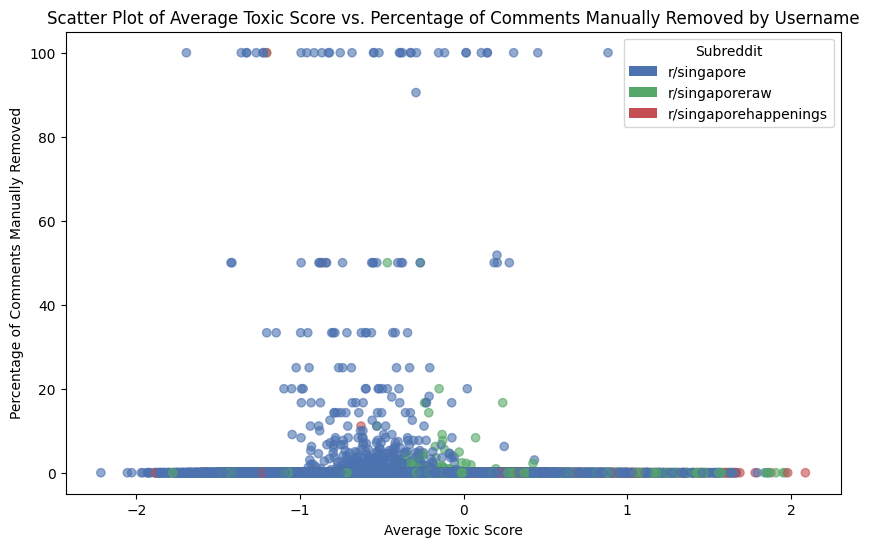

In [35]:
palette = {'r/singapore': "#4c72b0", 'r/singaporeraw': "#55a868", 'r/singaporehappenings': "#c44e52"}

# Plot the scatter plot
plt.figure(figsize=(10, 6))

# Map the 'most_frequent_subreddit' to colors based on the palette
colors = average_toxic_data_by_user['most_frequent_subreddit'].map(palette)

# Plot with colors based on the most frequent subreddit
plt.scatter(
    average_toxic_data_by_user['average_toxic_score'], 
    average_toxic_data_by_user['percentage_is_manual_removed'], 
    c=colors, 
    alpha=0.6
)

# Add labels and title
plt.xlabel('Average Toxic Score')
plt.ylabel('Percentage of Comments Manually Removed')
plt.title('Scatter Plot of Average Toxic Score vs. Percentage of Comments Manually Removed by Username')

# Create legend for subreddits
legend_elements = [Patch(facecolor=color, label=subreddit) for subreddit, color in palette.items()]
plt.legend(handles=legend_elements, title="Subreddit")

# Show plot
plt.show()

We expect the plot to look more like a straight line passing through the origin, because more toxic users should receive more moderation.

But we get a scatterplot that is quite flat. We observe that there is a good number of users who have high average toxicity scores, but have no comments being removed. This means that toxic users are not sufficiently moderated.

There are a small group of users that have a non-toxic average score, but have all of their comments deleted. This might mean small cases of inaccuracy in the moderation.

From the Inaccurate non-Toxic WordCloud, words such as 'singapore', 'people', 'money', 'government' and 'covid' are found in these non-toxic comments and are incorrectly collapsed by moderators. This could be caused by moderators thinking that a comment is toxic because it contains words having to do with certain topics, such as national politics.